# How to generate the skymap file

In [1]:
from skymap.skymap import romantessellation, tiles2asdf

NSIDE = 13
theta, phi, ramin, ramax, decmin, decmax, vertices = romantessellation(NSIDE)
tiles2asdf(theta, phi, ramin, ramax, decmin, decmax)


0...:...:...:...:...:...:...:...:...:...
1000...:...:...:...:...:...:...:...:...:...
2000...:...:...:...:...:...:...:...:...:...
3000...:...:...:...:...:...:...:...:...:...
4000..

1

# How to read the skymap file

The file contains extensions with the number of the sky tile. For each extension, which can be read as tiles[n] with n the number of the sky tile, there is a different number of records containing the metadata of each sky cell. 

## Structure of file

In [1]:
import asdf
skymap = asdf.open("skymap.asdf")
skymap.info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 3.2.1.dev54+g019c6a45
├─history (dict)
│ └─extensions (list)
│   └─[0] (ExtensionMetadata) ...
└─roman (dict)
  ├─datamodel_name (str): RomanSkycellsRefModel
  ├─meta (dict)
  │ ├─author (str): Dario Fadda
  │ ├─description (str): Skycells covering the celestial sphere
  │ ├─homepage (str): http://github.com/spacetelescope/skymap
  │ ├─instrument (dict) ...
  │ ├─nxy_skycell (int): 5000
  │ ├─origin (str): STSCI
  │ ├─pedigree (str): GROUND
  │ ├─plate_scale (float): 0.55
  │ └─4 not shown
  ├─projection_regions (NDArrayType) ...
  └─skycells (NDArrayType) ...
Some nodes not shown.


## Fields of sky cell metadata

In [3]:
print('Projection regions: ')
print(skymap['roman']['projection_regions'].dtype)
print('Skycells: ')
print(skymap['roman']['skycells'].dtype)

Projection regions: 
[('index', '<i4'), ('ra_tangent', '<f8'), ('dec_tangent', '<f8'), ('ra_min', '<f8'), ('ra_max', '<f8'), ('dec_min', '<f8'), ('dec_max', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('nx', '<i4'), ('ny', '<i4'), ('skycell_start', '<i4'), ('skycell_end', '<i4'), ('pixel_scale', '<f4')]
Skycells: 
[('name', '<U16'), ('ra_center', '<f8'), ('dec_center', '<f8'), ('orientat', '<f4'), ('x_tangent', '<f8'), ('y_tangent', '<f8'), ('ra_corn1', '<f8'), ('dec_corn1', '<f8'), ('ra_corn2', '<f8'), ('dec_corn2', '<f8'), ('ra_corn3', '<f8'), ('dec_corn3', '<f8'), ('ra_corn4', '<f8'), ('dec_corn4', '<f8')]


## Number of sky cells 

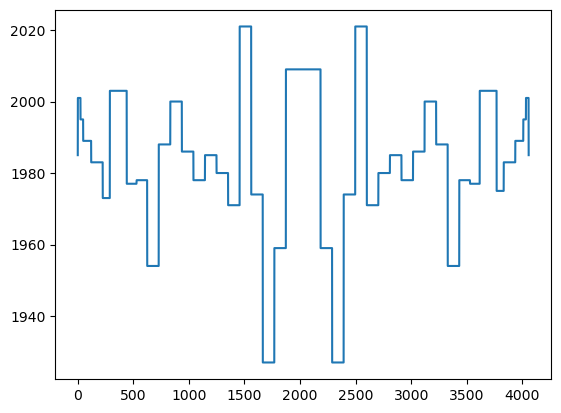

Median number of sky cells:  1983.0


In [4]:
# Number of sky cells for each sky tile
import matplotlib.pyplot as plt
import numpy as np
tiles = skymap['roman']['projection_regions']
ntiles = len(tiles)
lentiles = [tiles[i]['skycell_end']-tiles[i]['skycell_start'] for i in range(ntiles)]
plt.plot(lentiles)
plt.show()
print('Median number of sky cells: ', np.median(lentiles))

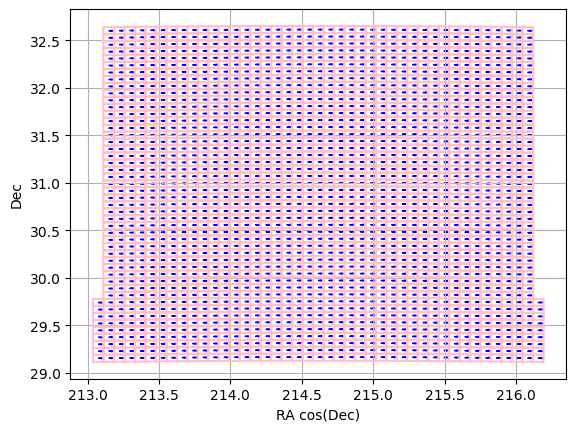

In [5]:
import asdf
import matplotlib.pyplot as plt
skymap = asdf.open("skymap.asdf")
tiles = skymap['roman']['projection_regions']
skycells = skymap['roman']['skycells']

import numpy as np
ntile = 1000
tile = tiles[ntile-1]
cells = skycells[tile['skycell_start']:tile['skycell_end']]

dd = 1./60

for c in cells:
    ac = c['ra_center']
    dc = c['dec_center']
    orient = (0 - c['orientat']) * np.pi/180
    cosfac = np.cos(dc * np.pi/180)
    c0 = tile['ra_tangent']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    ac = (ac - c0) * cosfac + c0
    c1 = (c1 - c0) * cosfac + c0
    c2 = (c2 - c0) * cosfac + c0
    c3 = (c3 - c0) * cosfac + c0
    c4 = (c4 - c0) * cosfac + c0
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')
    dx = dd * np.cos(orient)
    dy = dd * np.sin(orient)
    plt.arrow(ac,dc,dx, dy,head_width=0.01, color='blue')
plt.grid()
plt.xlabel('RA cos(Dec)')
plt.ylabel('Dec')
#plt.xlim(224,226)
#plt.ylim(89,90)
plt.show()

### Polar cap

It is better to plot it in polar coordinates

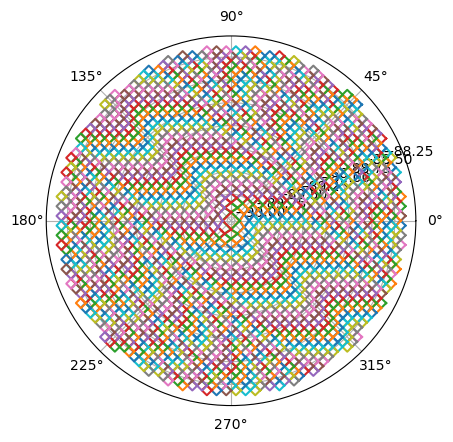

In [6]:
import asdf
import matplotlib.pyplot as plt
skymap = asdf.open("skymap.asdf")
tiles = skymap['roman']['projection_regions']
skycells = skymap['roman']['skycells']

import numpy as np
ntile = len(tiles)
tile = tiles[ntile-1]
cells = skycells[tile['skycell_start']:tile['skycell_end']]
dd = 0.04
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for c in cells:
    cosfac = np.cos(c['dec_corn1'] * np.pi/180)
    c0 = tile['ra_tangent']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    ax.plot(np.array([c1, c2, c3, c4, c1])* np.pi/180,
            [d1, d2, d3, d4, d1])
    ac = c['ra_center']* np.pi/180
    dc = 90-c['dec_center']
    orient = (90 - c['orientat']) * np.pi/180
    #plt.arrow(ac,dc,0,-dd,head_width=0.01, color='blue')
             
plt.show()

## Reading information, field by field

In [7]:
nskytile = 10
nskycell = 100

skytiles = skymap['roman']['projection_regions']
skycells = skymap['roman']['skycells']
tile = skytiles[nskytile]
cells = skycells[tile['skycell_start']:tile['skycell_end']]
cell = cells[nskycell]
print('Tile ', nskytile)
for field in tile.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(tile[field])))
print('\nCell ', nskycell)
for field in cell.dtype.names:
    print(' {0:25s}  {1:s}'.format(field,  str(cell[field])))

Tile  10
 index                      10
 ra_tangent                 22.5
 dec_tangent                82.7980584505
 ra_min                     11.25
 ra_max                     33.75
 dec_min                    80.9942307505
 dec_max                    84.6001008073
 orientat                   0.0
 x_tangent                  115264.5
 y_tangent                  118009.5
 nx                         230530
 ny                         236020
 skycell_start              19994
 skycell_end                21995
 nxy_skycell                5000
 skycell_border_pixels      100
 pixel_scale                1.5277777e-05

Cell  100
 name                       022p83x32y29
 ra_center                  13.8833067866
 dec_center                 81.1602174995
 orientat                   8.6166935
 x_tangent                  88899.5
 y_tangent                  103299.5
 ra_corn1                   13.6756604836
 dec_corn1                  81.1167780548
 ra_corn2                   14.1647973897
 dec_corn

## Plot a tile

Dec max,min is:  90.0 88.2006257455


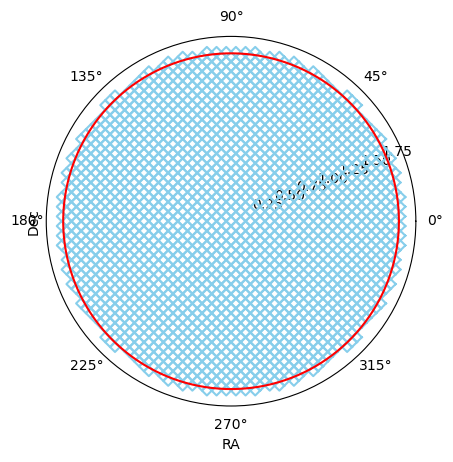

Dec max,min is:  -88.2006257455 -90.0


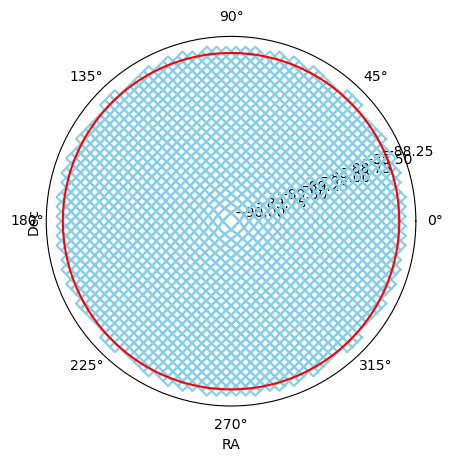

c0 is zero


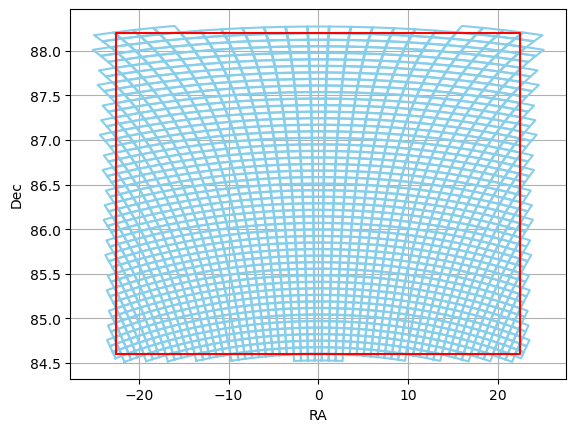

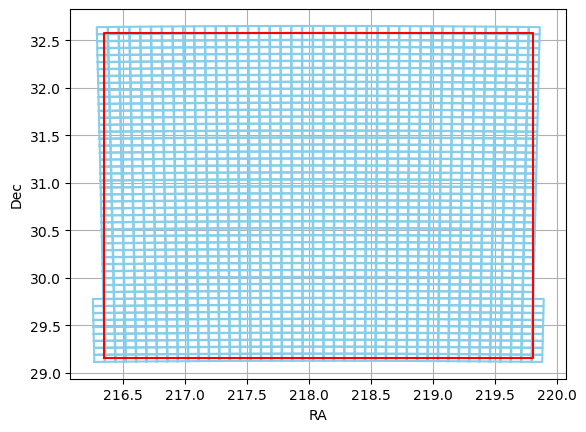

1

In [8]:
import asdf
from skymap.skymap import plotskytile
skymap = asdf.open("skymap.asdf")

plotskytile(skymap, 0)
plotskytile(skymap,len(skymap['roman']['projection_regions'])-1)
plotskytile(skymap, 1)
plotskytile(skymap, 1000)

### without Declination distortion

c0 is zero


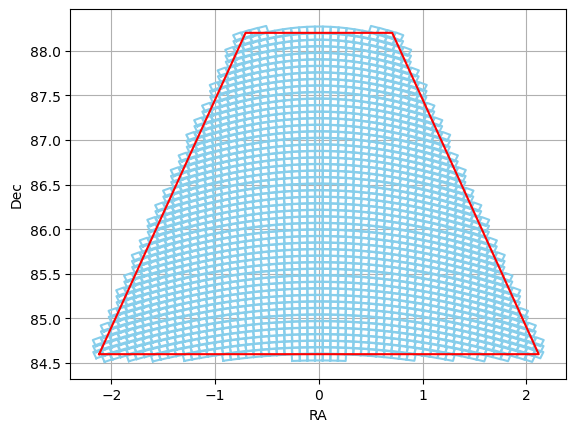

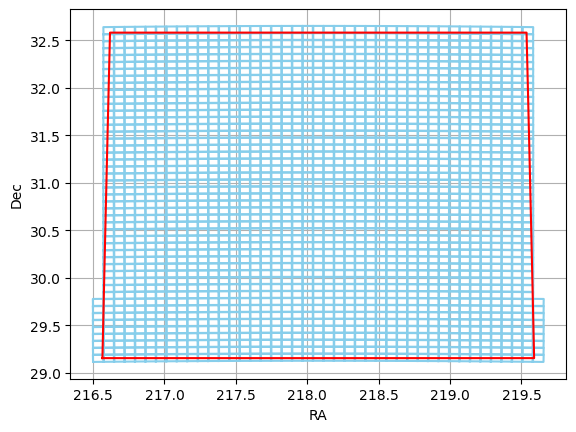

1

In [9]:
import asdf
from skymap.skymap import plotskytile
skymap = asdf.open("skymap.asdf")

plotskytile(skymap, 1, distortion=True)
plotskytile(skymap, 1000, distortion=True)

## Astrometry check

This section shows how to transform the corners of a skycell into coordinates using the WCS created from the metadata.
In particular the WCS is used to transform the equatorial coordinates of the corners of the skycells into xy coordinates in the system of the skycell. 

In [10]:
# Reading the file
import asdf
import numpy as np
skymap = asdf.open("skymap.asdf")

In [8]:
from astropy.wcs import WCS
nskytile = 1
nskycell = 1443
tile = skymap['roman']['projection_regions'][nskytile]
cells =  skymap['roman']['skycells'][tile['skycell_start']:tile['skycell_end']]
print('cells ', len(cells))
c = cells[nskycell]

# Compute the WCS of a skycell
ac, dc = tile['ra_tangent'], tile['dec_tangent']
xc, yc = c['x_tangent'], c['y_tangent']
orient = tile['orientat']
pix = tile['pixel_scale']
nxy = skymap['roman']['meta']['nxy_skycell']

wcs = WCS(naxis=2)
wcs.wcs.cdelt = [pix,pix]
wcs.wcs.ctype = ["RA---TAN", "DEC--TAN"]
wcs.wcs.crval = [ac, dc]
wcs.wcs.crpix = [xc, yc]
wcs.wcs.crota = [0, orient]  # CROTA2 is the rotation angle
wcs.array_shape = [nxy, nxy]
print(wcs)

cells  2001
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 0.0 86.4008076303 
CRPIX : -40700.5 60099.5 
NAXIS : 5000  5000


In [12]:
# Check on Corners of the cell
import numpy as np
ca = [c['ra_corn1'], c['ra_corn2'], c['ra_corn3'], c['ra_corn4']]
cd = [c['dec_corn1'], c['dec_corn2'], c['dec_corn3'], c['dec_corn4']]

x = [ -0.5, 4999.5, 4999.5, -0.5]
y = [ -0.5, -0.5, 4999.5, 4999.5]
a, d = wcs.wcs_pix2world(x, y, 0)

xx,yy = wcs.wcs_world2pix(np.array(ca), np.array(cd), 0)
print('Corners in skycell coordinates:')
print('xx ', xx)
print('yy ', yy)

print('Difference between coordinates in pixel units:')
print('Difference: a - ca',(a - ca) * np.cos(dc * np.pi/180)/pix,' pixels')
print('Difference: d - cd',(d - cd) /pix, ' pixels')

Corners in skycell coordinates:
xx  [-4.99240622e-01  4.99950085e+03  4.99950085e+03 -4.99240717e-01]
yy  [-5.01122069e-01 -5.01117511e-01  4.99949897e+03  4.99949897e+03]
Difference between coordinates in pixel units:
Difference: a - ca [-0.00047324 -0.00052873 -0.00054639 -0.00048932]  pixels
Difference: d - cd [0.00121455 0.00123385 0.00114645 0.00112303]  pixels


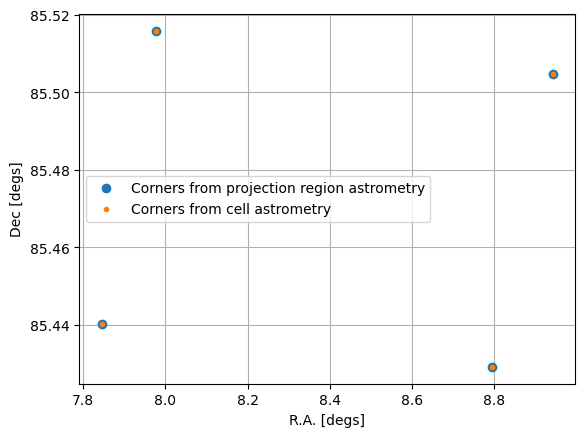

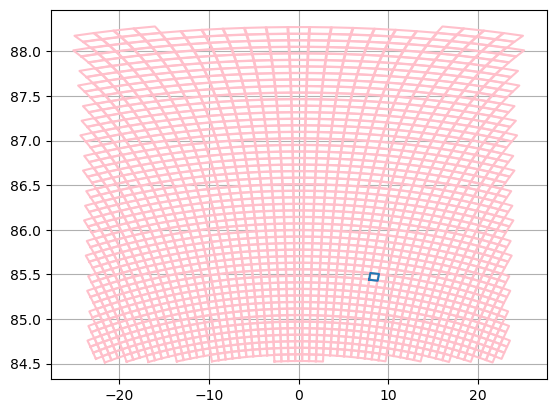

In [13]:
# Graphical representation
import matplotlib.pyplot as plt
plt.plot(ca, cd,'o',label='Corners from projection region astrometry',)
plt.plot( a ,d ,'.',label='Corners from cell astrometry',)
plt.legend()
plt.grid()
plt.xlabel('R.A. [degs]')
plt.ylabel('Dec [degs]')
plt.show()

c0 = tile['ra_tangent']
if c0 == 0:
    for i in range(len(ca)):
        if ca[i] > 270:
            ca[i] -= 360
        if cd[i] > 270:
            cd[i] -= 360

for c in cells:
    ac = c['ra_center']
    dc = c['dec_center']
    c1 = c['ra_corn1']
    c2 = c['ra_corn2']
    c3 = c['ra_corn3']
    c4 = c['ra_corn4']
    d1 = c['dec_corn1']
    d2 = c['dec_corn2']
    d3 = c['dec_corn3']
    d4 = c['dec_corn4']
    if c0 == 0:
        if c1 > 270:
            c1 -= 360
        if c2 > 270:
            c2 -= 360
        if c3 > 270:
            c3 -= 360
        if c4 > 270:
            c4 -= 360
    plt.plot([c1, c2, c3, c4, c1],
             [d1, d2, d3, d4, d1], color='pink')

ca.append(ca[0])
cd.append(cd[0])
plt.plot(ca,cd)
plt.grid()
plt.show()


# ASDF format

In [4]:
import asdf
skymap = asdf.open("skymap.asdf")

tiles = skymap['roman']['projection_regions']
cells = skymap['roman']['skycells']

roman = asdf.tagged.TaggedDict()

from datetime import time,date,datetime
d = date(2025, 1, 1)
t = time(0, 0, 0)
startdate = datetime.combine(d, t)

# This does not work ...
#from astropy.time import Time
#startdate = Time("2025-01-01T00:00:00.000", scale="utc")

instrument = {'name':'WFI'}
meta = {'author': "Dario Fadda",
  'description':"Skycells covering the celestial sphere",
  'homepage': "http://github.com/spacetelescope/skymap",
  'instrument': instrument,
  'nxy_skycell': 5000,
  'origin': 'STSCI',
'pedigree':'GROUND',
'plate_scale': 0.55,
'reftype': 'SKYCELLS',
'skycell_border_pixels':100,
'telescope': 'ROMAN',
'useafter': startdate,
}

roman['meta'] = meta
roman['projection_regions'] = tiles
roman['skycells'] = cells
roman['datamodel_name'] = "RomanSkycellsRefModel"

tree = {"roman":roman}

af = asdf.AsdfFile(tree)

# Before saving
af.info()
af.write_to("test.asdf")

type(roman)

root (AsdfObject)
└─roman (TaggedDict)
  ├─meta (dict)
  │ ├─author (str): Dario Fadda
  │ ├─description (str): Skycells covering the celestial sphere
  │ ├─homepage (str): http://github.com/spacetelescope/skymap
  │ ├─instrument (dict)
  │ │ └─name (str): WFI
  │ ├─nxy_skycell (int): 5000
  │ ├─origin (str): STSCI
  │ ├─pedigree (str): GROUND
  │ ├─plate_scale (float): 0.55
  │ ├─reftype (str): SKYCELLS
  │ ├─skycell_border_pixels (int): 100
  │ ├─telescope (str): ROMAN
  │ └─useafter (datetime): 2025-01-01 00:00:00
  ├─projection_regions (NDArrayType): shape=(4058,), dtype=void736
  ├─skycells (NDArrayType): shape=(8045162,), dtype=void1312
  └─datamodel_name (str): RomanSkycellsRefModel
root (AsdfObject)
└─roman (TaggedDict)
  ├─meta (dict)
  │ ├─author (str): Dario Fadda
  │ ├─description (str): Skycells covering the celestial sphere
  │ ├─homepage (str): http://github.com/spacetelescope/skymap
  │ ├─instrument (dict)
  │ │ └─name (str): WFI
  │ ├─nxy_skycell (int): 5000
  │ ├─orig

asdf.tagged.TaggedDict